In [1]:

# Initial Imports
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

# Set the random seed for reproducibility
# Note: This is used for model prototyping, but it is good practice to comment this out and run multiple experiments to evaluate your model.
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [24]:

#df = pd.read_csv(
   # Path("WEOApr2021all.csv"), parse_dates=True
#)

#df = pd.read_csv(
    #Path("GDP.csv"),
    #index_col="DATE",
    #infer_datetime_format=True,
   # parse_dates=True,
#)
#df.tail()
#set date as index 
#create lagged column for next quarters gdp


df = pd.read_csv(
    Path("WEOApr2021all.csv")
)

df = df[(df["Subject Descriptor"]=="Inflation, average consumer prices") & (df["Units"]=="Percent change")]
df.drop(columns=["Subject Descriptor", "Units", "Scale", "Estimates Start After"], inplace=True)
df = df.T
df.columns = df.loc["Country"]
df = df.drop("Country", axis=0)
df.head()

Country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
WEO Country Code,512,914,612,614,311,213,911,314,193,122,...,111,298,927,846,299,582,487,474,754,698
ISO,AFG,ALB,DZA,AGO,ATG,ARG,ARM,ABW,AUS,AUT,...,USA,URY,UZB,VUT,VEN,VNM,WBG,YEM,ZMB,ZWE
WEO Subject Code,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH,...,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH,PCPIPCH
Subject Notes,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...,Annual percentages of average consumer prices ...
Country/Series-specific Notes,"See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...",...,"See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr...","See notes for: Inflation, average consumer pr..."


In [25]:

US_df = df[['United States']]

US_gdp = US_df.drop(labels=["WEO Country Code", "ISO", "WEO Subject Code", "Subject Notes", "Country/Series-specific Notes"], axis=0)

US_gdp.rename(columns = {'Country':'Year'}, inplace = True)

#df = df.replace(",","", regex=True)
#df = df.astype("float")
#df


US_Inflation = US_gdp.replace(",","", regex=True)
US_Inflation = US_gdp.astype("float")
US_Inflation

Country,United States
1980,13.502
1981,10.378
1982,6.158
1983,3.160
1984,4.368
1985,3.528
1986,1.944
1987,3.578
1988,4.100
1989,4.791


In [26]:
def window_data(US_Inflation, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(US_gdp) - window):
        features = US_gdp.iloc[i : (i + window), feature_col_number]
        target = US_gdp.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [27]:
# Creating the features (X) and target (y) data using the window_data() function.
window_size = 20

feature_column = 0
target_column = 0
X, y = window_data(US_Inflation, window_size, feature_column, target_column)
print (f"X sample values:\n{X} \n")
print (f"y sample values:\n{y[:5]}")

X sample values:
[['13.502' '10.378' '6.158' '3.16' '4.368' '3.528' '1.944' '3.578' '4.1'
  '4.791' '5.419' '4.216' '3.042' '2.97' '2.596' '2.805' '2.937' '2.338'
  '1.547' '2.193']
 ['10.378' '6.158' '3.16' '4.368' '3.528' '1.944' '3.578' '4.1' '4.791'
  '5.419' '4.216' '3.042' '2.97' '2.596' '2.805' '2.937' '2.338' '1.547'
  '2.193' '3.367']
 ['6.158' '3.16' '4.368' '3.528' '1.944' '3.578' '4.1' '4.791' '5.419'
  '4.216' '3.042' '2.97' '2.596' '2.805' '2.937' '2.338' '1.547' '2.193'
  '3.367' '2.817']
 ['3.16' '4.368' '3.528' '1.944' '3.578' '4.1' '4.791' '5.419' '4.216'
  '3.042' '2.97' '2.596' '2.805' '2.937' '2.338' '1.547' '2.193' '3.367'
  '2.817' '1.596']
 ['4.368' '3.528' '1.944' '3.578' '4.1' '4.791' '5.419' '4.216' '3.042'
  '2.97' '2.596' '2.805' '2.937' '2.338' '1.547' '2.193' '3.367' '2.817'
  '1.596' '2.298']
 ['3.528' '1.944' '3.578' '4.1' '4.791' '5.419' '4.216' '3.042' '2.97'
  '2.596' '2.805' '2.937' '2.338' '1.547' '2.193' '3.367' '2.817' '1.596'
  '2.298' '2.668']


In [28]:
type(X)



#XS = float(X)
#yS = float(y)

numpy.ndarray

In [29]:
# Use 90% of the data for training and the remainder for testing
split = int(0.9 * len(X))
X_train = X[: split]
X_test = X[split - 20:]
y_train = y[: split]
y_test = y[split - 20:]

In [30]:

# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [31]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[1.        ]
  [1.        ]
  [1.        ]
  [0.60637742]
  [0.81686705]
  [0.67050009]
  [0.39449381]
  [0.67921241]
  [0.77016902]
  [0.89057327]
  [1.        ]
  [1.        ]
  [0.81305925]
  [0.79564692]
  [0.70519952]
  [0.75574365]
  [0.78766626]
  [0.64280532]
  [0.45151149]
  [0.60773881]]

 [[0.73868674]
  [0.52213792]
  [0.34981566]
  [0.81686705]
  [0.67050009]
  [0.39449381]
  [0.67921241]
  [0.77016902]
  [0.89057327]
  [1.        ]
  [0.7903816 ]
  [0.74118166]
  [0.79564692]
  [0.70519952]
  [0.75574365]
  [0.78766626]
  [0.64280532]
  [0.45151149]
  [0.60773881]
  [0.89165659]]

 [[0.38569636]
  [0.18265202]
  [0.61179787]
  [0.67050009]
  [0.39449381]
  [0.67921241]
  [0.77016902]
  [0.89057327]
  [1.        ]
  [0.7903816 ]
  [0.58581634]
  [0.72530864]
  [0.70519952]
  [0.75574365]
  [0.78766626]
  [0.64280532]
  [0.45151149]
  [0.60773881]
  [0.89165659]
  [0.75864571]]

 [[0.13492263]
  [0.31944287]
  [0.42962481]
  [0.39449381]
  [0.679212

In [32]:
y_train

array([[0.89165659],
       [0.75864571],
       [0.46336155],
       [0.6331318 ],
       [0.72261185],
       [0.89141475],
       [0.85659008],
       [0.77170496],
       [1.        ],
       [0.        ],
       [0.4732769 ],
       [0.83675937],
       [0.57871826],
       [0.43192261],
       [0.46795647],
       [0.10665054],
       [0.38379686],
       [0.59419589],
       [0.66602177],
       [0.51559855],
       [0.37920193],
       [0.62490931],
       [0.65779927],
       [0.68295042]])

In [33]:

# Import required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [34]:

# Define the LSTM RNN model.
model = Sequential()

number_units = 5
dropout_fraction = 0.4

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))


model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer


model.add(Dense(1))

In [35]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error", metrics= ["accuracy"])

In [36]:
# Summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 20, 5)             140       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20, 5)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 20, 5)             220       
_________________________________________________________________
dropout_4 (Dropout)          (None, 20, 5)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dropout_5 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [51]:
# Train the model
model.fit(X_train, y_train, epochs=200, shuffle=False, batch_size=1, verbose=1)

Epoch 1/200
24/24 [==============================] - 2s 10ms/step - loss: 0.0478 - accuracy: 0.0417
Epoch 2/200
24/24 [==============================] - 0s 11ms/step - loss: 0.0442 - accuracy: 0.0417
Epoch 3/200
24/24 [==============================] - 0s 10ms/step - loss: 0.0520 - accuracy: 0.0417
Epoch 4/200
24/24 [==============================] - 0s 10ms/step - loss: 0.0458 - accuracy: 0.0417
Epoch 5/200
24/24 [==============================] - 0s 10ms/step - loss: 0.0597 - accuracy: 0.0417
Epoch 6/200
24/24 [==============================] - 0s 10ms/step - loss: 0.0453 - accuracy: 0.0417
Epoch 7/200
24/24 [==============================] - 0s 10ms/step - loss: 0.0444 - accuracy: 0.0417
Epoch 8/200
24/24 [==============================] - 0s 10ms/step - loss: 0.0543 - accuracy: 0.0417
Epoch 9/200
24/24 [==============================] - 0s 10ms/step - loss: 0.0483 - accuracy: 0.0417
Epoch 10/200
24/24 [==============================] - 0s 10ms/step - loss: 0.0522 - accuracy: 0.0417

In [52]:
# Evaluate the model
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 12ms/step - loss: 0.0357 - accuracy: 0.0435


[0.03566591441631317, 0.043478261679410934]

In [53]:
predicted = model.predict(X_test)
predicted

array([[0.67863387],
       [0.7098503 ],
       [0.72815216],
       [0.74445915],
       [0.71617573],
       [0.50982744],
       [0.50814664],
       [0.5080507 ],
       [0.50683975],
       [0.50671196],
       [0.5086493 ],
       [0.5130826 ],
       [0.5182762 ],
       [0.5250912 ],
       [0.5312771 ],
       [0.53357893],
       [0.5377529 ],
       [0.54197055],
       [0.5442473 ],
       [0.5454435 ],
       [0.5451587 ],
       [0.5432718 ],
       [0.54132056]], dtype=float32)

In [54]:
X_test

array([[[0.23596821],
        [0.22432341],
        [0.08609846],
        [0.67921241],
        [0.77016902],
        [0.89057327],
        [1.        ],
        [0.7903816 ],
        [0.58581634],
        [0.5732706 ],
        [0.50810246],
        [0.68893298],
        [0.78766626],
        [0.64280532],
        [0.45151149],
        [0.60773881],
        [0.89165659],
        [0.75864571],
        [0.46336155],
        [0.6331318 ]],

       [[0.16570473],
        [0.04495527],
        [0.44046845],
        [0.77016902],
        [0.89057327],
        [1.        ],
        [0.7903816 ],
        [0.58581634],
        [0.5732706 ],
        [0.50810246],
        [0.54451995],
        [0.71803351],
        [0.64280532],
        [0.45151149],
        [0.60773881],
        [0.89165659],
        [0.75864571],
        [0.46336155],
        [0.6331318 ],
        [0.72261185]],

       [[0.03320786],
        [0.22998528],
        [0.55367599],
        [0.89057327],
        [1.        ],
      

In [55]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [56]:
# Create a DataFrame of Real and Predicted values
Inflation = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = df.index[-len(real_prices): ])
Inflation

,Real,Predicted
2004,2.668,2.486151
2005,3.366,2.615231
2006,3.222,2.690909
2007,2.871,2.758338
2008,3.815,2.641387
2009,-0.320,1.788136
2010,1.637,1.781186
2011,3.140,1.780790
2012,2.073,1.775782
2013,1.466,1.775254


<AxesSubplot:>

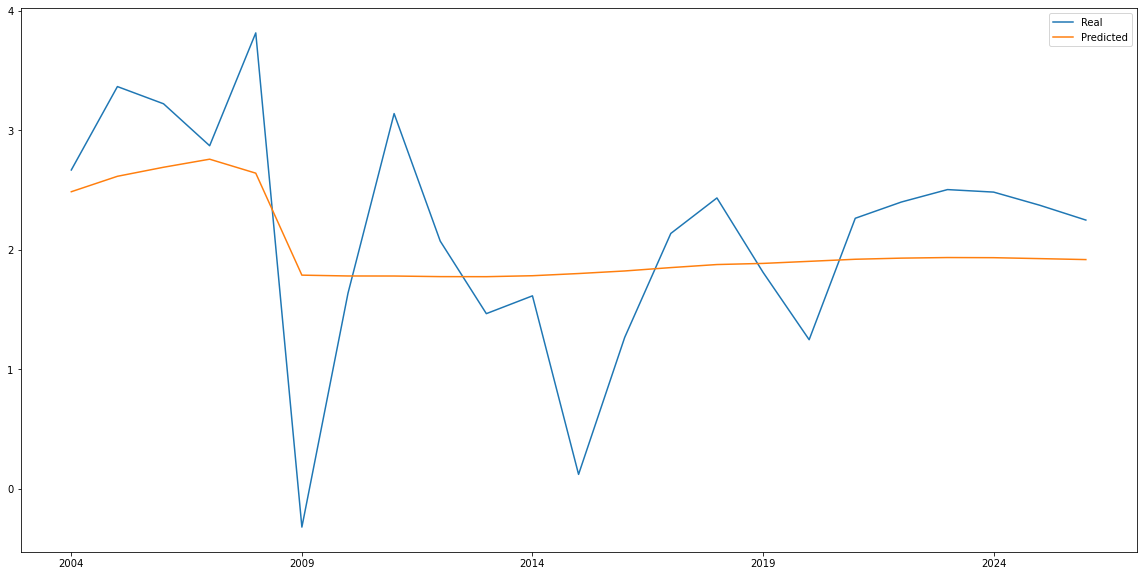

In [59]:
# Plot the real vs predicted prices as a line chart
Inflation.plot(figsize=(20,10))